# Setup Library and Dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Quick Look

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
temp_df = df.dtypes.value_counts().reset_index()
temp_df

,index,0
0,object,18
1,int64,2
2,float64,1


Text(0, 0.5, 'numbwe of features')

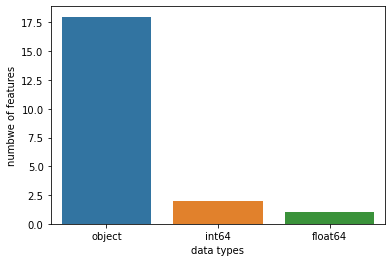

In [ ]:
sns.barplot(x=temp_df['index'],y=temp_df[0])
plt.xlabel('data types')
plt.ylabel('numbwe of features')

# Data Preprocessing

## Missing Value

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df[df['TotalCharges']==' '].head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [ ]:
df = df[df['TotalCharges']!=' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5901,6172-FECYY,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,84.50,4254.85,Yes
3735,3489-HHPFY,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.05,134.05,No
6741,2180-DXNEG,Female,0,No,No,12,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.00,1062.10,Yes
5618,9932-WBWIK,Male,0,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,215.25,No
1563,3223-DWFIO,Male,1,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,69.35,261.65,No


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Check duplicate value

In [ ]:
df.duplicated().sum()

0

#  Descriptive Analysis

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


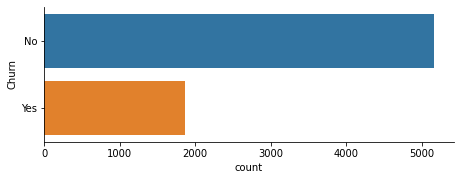

In [ ]:
sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5)
plt.show()

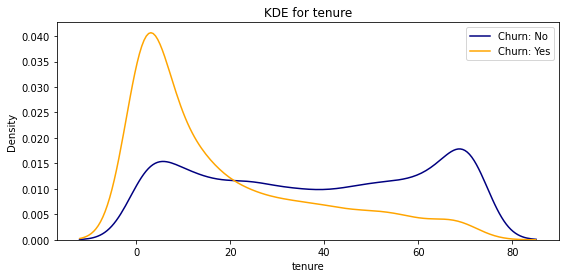

In [ ]:
plt.figure(figsize=(9,4))
plt.title('KDE for tenure')
sns.kdeplot(df[df['Churn'] == 'No']['tenure'].dropna(), color= 'navy', label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'].dropna(), color= 'orange', label= 'Churn: Yes')
plt.legend()
plt.show()

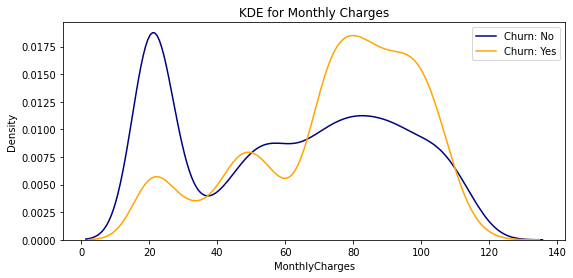

In [ ]:
plt.figure(figsize=(9,4))
plt.title('KDE for Monthly Charges')
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'].dropna(), color= 'navy', label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'].dropna(), color= 'orange', label= 'Churn: Yes')
plt.legend()
plt.show()

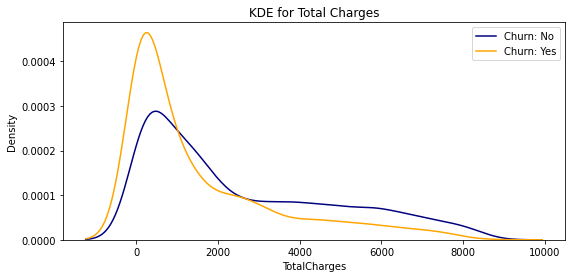

In [ ]:
plt.figure(figsize=(9,4))
plt.title('KDE for Total Charges')
sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'].dropna(), color= 'navy', label= 'Churn: No')
sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'].dropna(), color= 'orange', label= 'Churn: Yes')
plt.legend()
plt.show()

## Checking Categorical Data

In [ ]:
group_partner = df.groupby('Partner')["Churn"].value_counts(normalize=True)
group_partner = group_partner.to_frame()
group_partner = group_partner.rename({"Churn": 'percentage of customers'}, axis=1).reset_index()

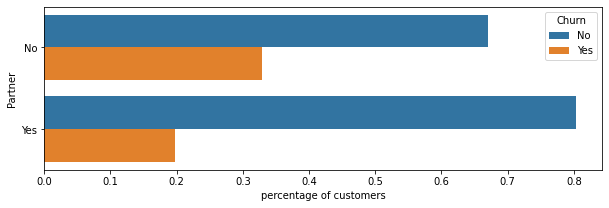

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(x='percentage of customers', y='Partner', hue='Churn', data=group_partner)
plt.show()

# Quick Classification

In [ ]:
X = df.drop(['Churn','customerID'],1)
y = df['Churn']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
y.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [ ]:
X_dummy = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y)

In [ ]:
X_train.shape

(5274, 45)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_test,y_test)

0.8026166097838453

# Conclusion

We can conclude the EDA and model. 

**EDA**

- Recent users are more likely churn.
- Client with higher monthly charges and lower total charges are more likely churn.

**Model**

Random Forest have accuracy about 80.2% which is greater than the treshold. So the model has the better result.